In [1]:
import re
import json
import numpy as np
import pandas as pd
from pathlib import Path
from qwen_math_parser import extract_answer, strip_string
from grader import math_equal
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
result_df = pd.read_csv(
    Path.cwd().parent / "results" / "self_certainty_forward_pass.csv"
)

In [3]:
result_df["accuracy"] = (
    result_df["accuracy"].map({True: "Correct", False: "Incorrect"}).astype("category")
)

# Forward pass

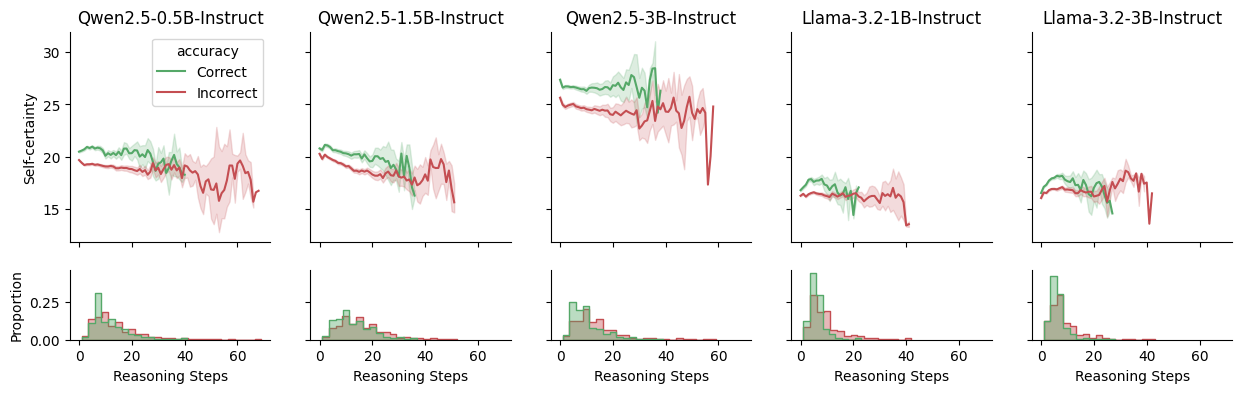

In [4]:
fig, axs = plt.subplots(
    figsize=(15, 4),
    ncols=5,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model_id in enumerate(
    [
        "Qwen/Qwen2.5-0.5B-Instruct",
        "Qwen/Qwen2.5-1.5B-Instruct",
        "Qwen/Qwen2.5-3B-Instruct",
        "meta-llama/Llama-3.2-1B-Instruct",
        "meta-llama/Llama-3.2-3B-Instruct",
    ]
):
    title = model_id[5:] if i <= 2 else model_id[11:]
    sns.lineplot(
        result_df[(result_df.model_id == model_id) & (result_df.dataset == "math500")],
        x="reasoning_step",
        y="average_divergence",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        sns.histplot(
            result_df[
                (result_df.model_id == model_id)
                & (result_df.dataset == "math500")
                & (result_df.accuracy == bol)
            ],
            x="n_reasoning_steps",
            ax=axs[1, i],
            binwidth=2.5,
            element="step",
            stat="proportion",
            color=col,
            label=bol,
            alpha=0.4,
        )
    axs[0, i].set(title=title)
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 5):
    axs[0, i].legend_.remove()
sns.despine()
plt.savefig(
    Path.cwd().parent / "figures" / "figure_3.pdf", bbox_inches="tight", dpi=300
)

# Danish dataset

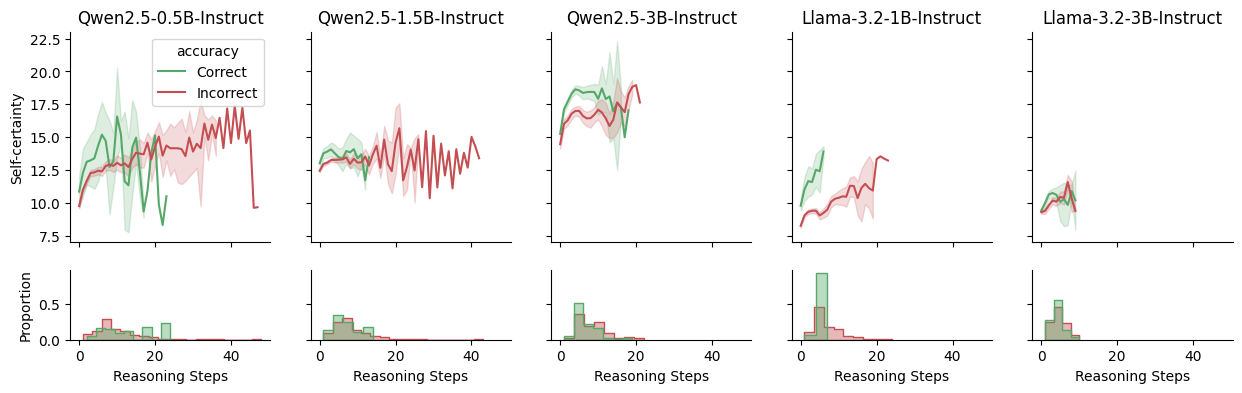

In [5]:
fig, axs = plt.subplots(
    figsize=(15, 4),
    ncols=5,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model_id in enumerate(
    [
        "Qwen/Qwen2.5-0.5B-Instruct",
        "Qwen/Qwen2.5-1.5B-Instruct",
        "Qwen/Qwen2.5-3B-Instruct",
        "meta-llama/Llama-3.2-1B-Instruct",
        "meta-llama/Llama-3.2-3B-Instruct",
    ]
):
    title = model_id[5:] if i <= 2 else model_id[11:]
    sns.lineplot(
        result_df[(result_df.model_id == model_id) & (result_df.dataset == "gsm8k-da")],
        x="reasoning_step",
        y="average_divergence",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        try:
            sns.histplot(
                result_df[
                    (result_df.model_id == model_id)
                    & (result_df.dataset == "gsm8k-da")
                    & (result_df.accuracy == bol)
                ],
                x="n_reasoning_steps",
                ax=axs[1, i],
                binwidth=2.5,
                element="step",
                stat="proportion",
                color=col,
                label=bol,
                alpha=0.4,
            )
        except ValueError:
            pass
    axs[0, i].set(title=title)
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 5):
    axs[0, i].legend_.remove()

sns.despine()

# English dataset

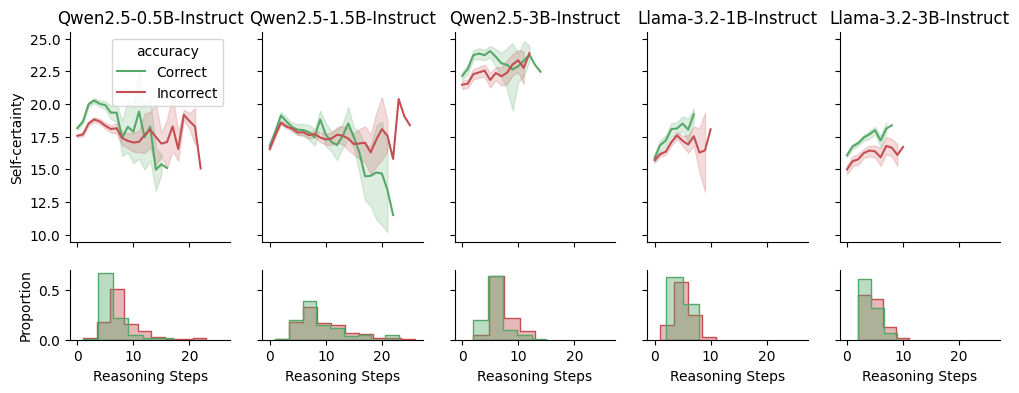

In [6]:
fig, axs = plt.subplots(
    figsize=(12, 4),
    ncols=5,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model_id in enumerate(
    [
        "Qwen/Qwen2.5-0.5B-Instruct",
        "Qwen/Qwen2.5-1.5B-Instruct",
        "Qwen/Qwen2.5-3B-Instruct",
        "meta-llama/Llama-3.2-1B-Instruct",
        "meta-llama/Llama-3.2-3B-Instruct",
    ]
):
    title = model_id[5:] if i <= 2 else model_id[11:]
    sns.lineplot(
        result_df[(result_df.model_id == model_id) & (result_df.dataset == "gsm8k-en")],
        x="reasoning_step",
        y="average_divergence",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        try:
            sns.histplot(
                result_df[
                    (result_df.model_id == model_id)
                    & (result_df.dataset == "gsm8k-en")
                    & (result_df.accuracy == bol)
                ],
                x="n_reasoning_steps",
                ax=axs[1, i],
                binwidth=2.5,
                element="step",
                stat="proportion",
                color=col,
                label=bol,
                alpha=0.4,
            )
        except ValueError:
            pass
    axs[0, i].set(title=title)
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 5):
    axs[0, i].legend_.remove()

sns.despine()